LIBRARY

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import joblib

MENYIAPKAN DATA

In [38]:
df = pd.read_csv('heart2.csv')

In [39]:
df.shape

(1189, 12)

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1189.000000,1189.000000,1189.00000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.719933,0.764508,3.23381,132.164003,210.311186,0.213625,0.698907,139.724138,0.387721,0.922288,1.624054,0.529016
std,9.362137,0.424484,0.93519,18.373167,101.446876,0.410037,0.870489,25.526634,0.487435,1.086665,0.610619,0.499367
min,28.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.00000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.00000,130.000000,229.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.00000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.00000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1189 non-null   int64  
 1   sex       1189 non-null   int64  
 2   cp        1189 non-null   int64  
 3   trestbps  1189 non-null   int64  
 4   chol      1189 non-null   int64  
 5   fbs       1189 non-null   int64  
 6   restecg   1189 non-null   int64  
 7   thalach   1189 non-null   int64  
 8   exang     1189 non-null   int64  
 9   oldpeak   1189 non-null   float64
 10  slope     1189 non-null   int64  
 11  target    1189 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.6 KB


In [43]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment"]

for i in range(len(info)):
    print(f'{df.columns[i]}: {info[i]}')

age: age
sex: 1: male, 0: female
cp: chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps: resting blood pressure
chol:  serum cholestoral in mg/dl
fbs: fasting blood sugar > 120 mg/dl
restecg: resting electrocardiographic results (values 0,1,2)
thalach:  maximum heart rate achieved
exang: exercise induced angina
oldpeak: oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment


<Axes: >

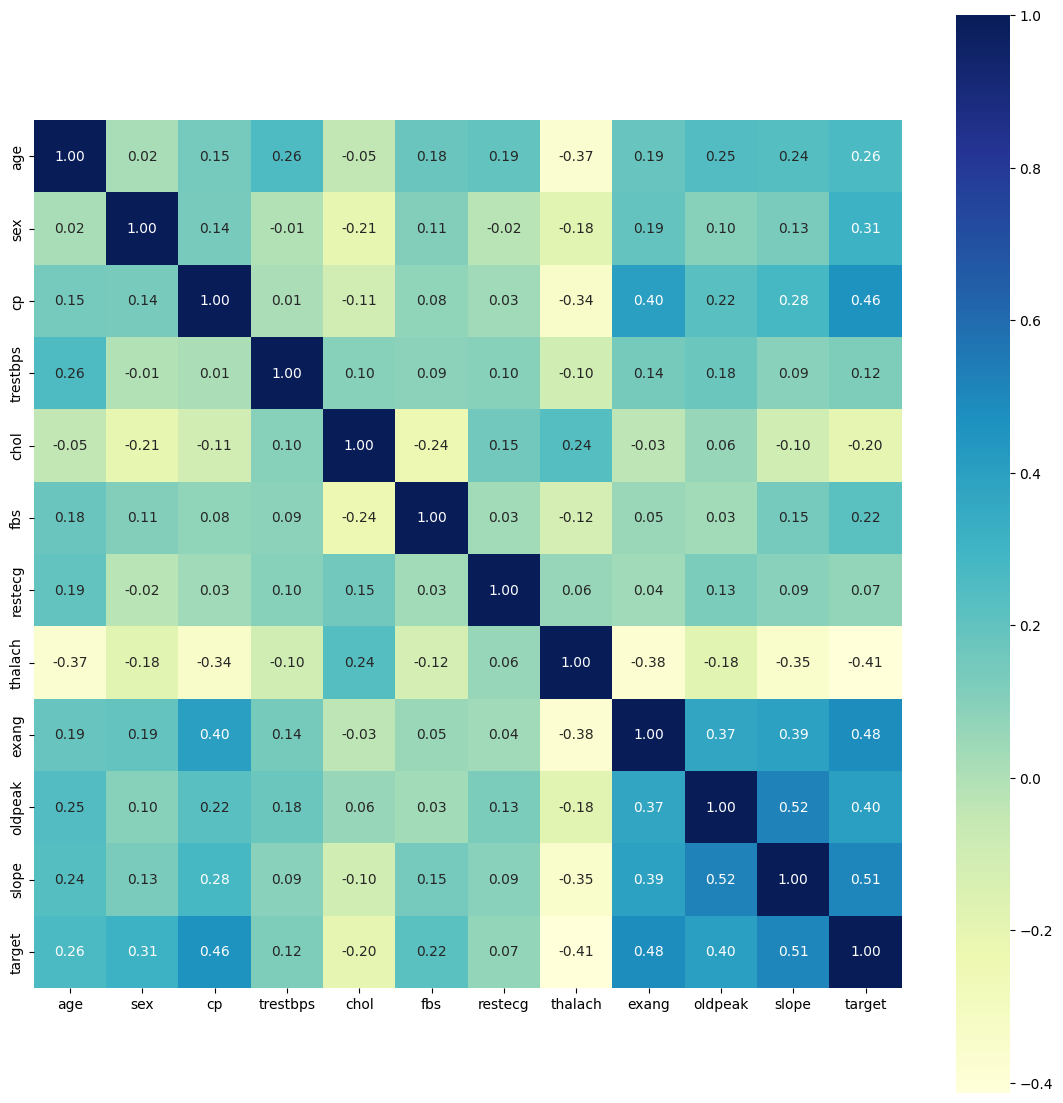

In [44]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, square = True, fmt=".2f", cmap="YlGnBu")

In [45]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
slope       0.506476
exang       0.481113
cp          0.459505
thalach     0.413143
oldpeak     0.399094
sex         0.310233
age         0.262179
fbs         0.216358
chol        0.197941
trestbps    0.120905
restecg     0.072398
Name: target, dtype: float64


target
1    629
0    560
Name: count, dtype: int64


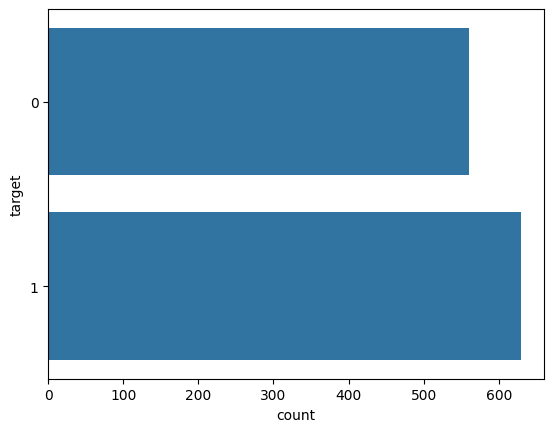

In [46]:
y = df["target"]
sns.countplot(y=y)
target_temp = df.target.value_counts()
print(target_temp)

In [47]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 184.82
Percentage of patience with heart problems: 207.59


In [48]:
X = df.drop("target", axis=1)
y = df["target"]

MENGANALISA GENDER

In [49]:
df["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

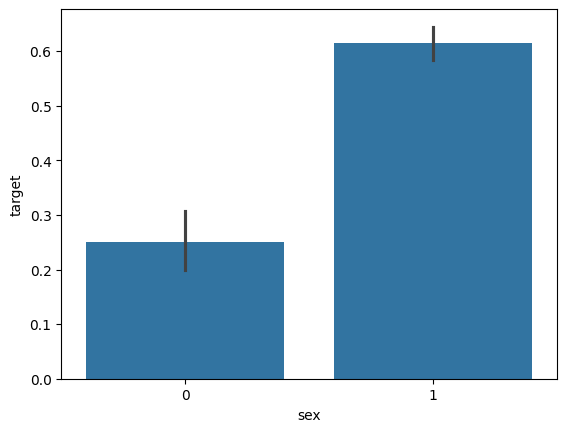

In [50]:
sns.barplot(x = df["sex"], y = y)

MENGANALISA CHEST PAIN

In [51]:
df["cp"].unique()

array([2, 3, 4, 1])

<Axes: xlabel='cp', ylabel='target'>

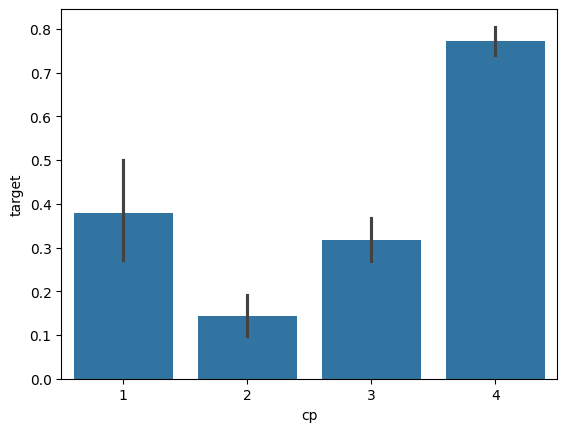

In [52]:
sns.barplot(x = df["cp"], y = y)

MENGANALISA FASTING BLOOD SUGAR

In [53]:
df["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

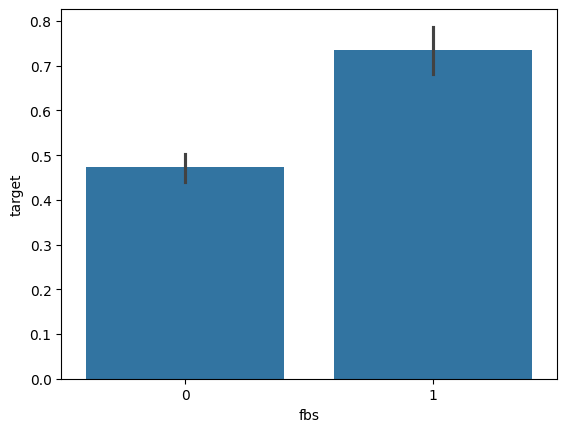

In [54]:
sns.barplot(x = df["fbs"], y = y)

MENGANALISA RESTING ELECTROCARDIOGRAPHIC

In [55]:
df["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

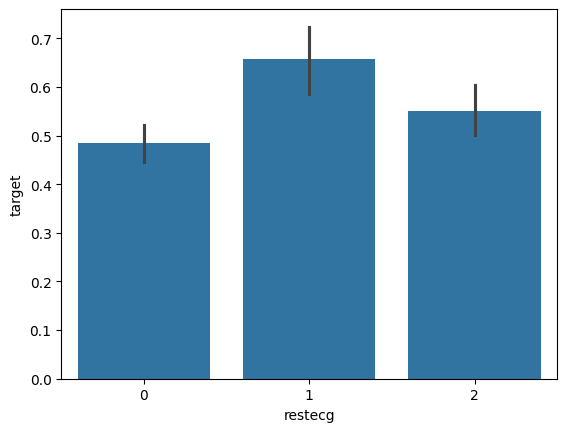

In [56]:
sns.barplot(x = df["restecg"], y = y)

MENGANALISA EXERCISE INDUCED ANGINA

In [57]:
df["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

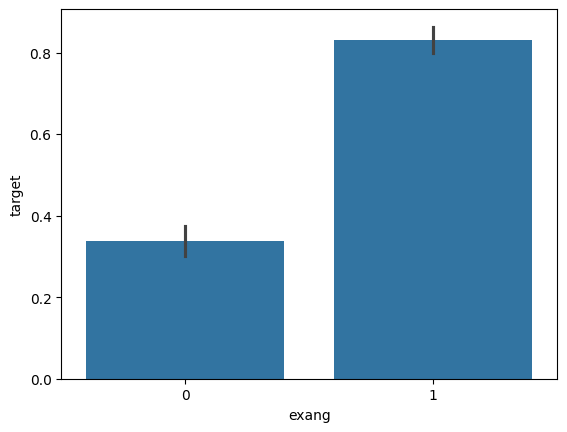

In [58]:
sns.barplot(x = df["exang"], y = y)

MENGANALISA SLOPE DARI PEAK EXERCISE

In [59]:
df["slope"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='slope', ylabel='target'>

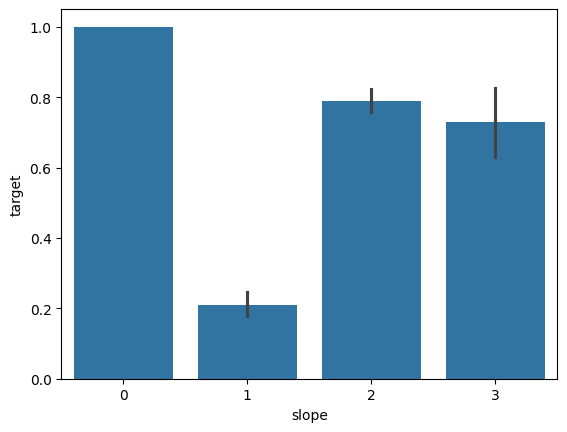

In [60]:
sns.barplot(x = df["slope"], y = y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

HYPERPARAMETER TUNING

In [62]:
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [63]:
rf = RandomForestClassifier()
rs_rf = RandomizedSearchCV(rf, param_distributions=rf_grid, cv=5, n_iter=20, verbose=True, random_state=42)
rs_rf.fit(X_train, y_train)

print(f"Best hyperparameters found by RandomizedSearchCV: {rs_rf.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found by RandomizedSearchCV: {'n_estimators': 510, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': None}


EVAL

In [64]:
best_rf = rs_rf.best_estimator_

y_pred = best_rf.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.5f}")

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy on test set: 0.91597
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       111
           1       0.90      0.95      0.92       127

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.92       238
weighted avg       0.92      0.92      0.92       238



CONFUSION MATRIKS

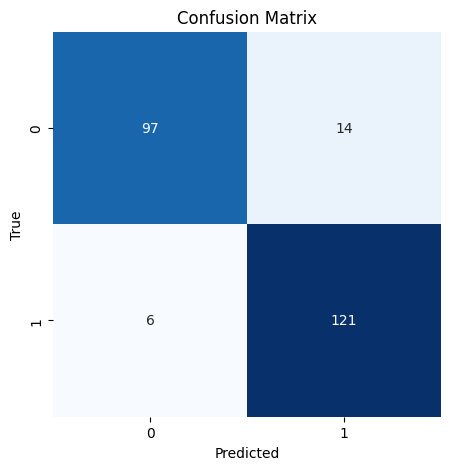

In [66]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")

plot_conf_mat(y_test, y_pred)

CROSS VALIDATION

In [67]:
cv_acc = cross_val_score(best_rf, X, y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {np.mean(cv_acc):.5f} (+/- {np.std(cv_acc):.5f})")

Cross-Validation Accuracy: 0.88560 (+/- 0.03275)


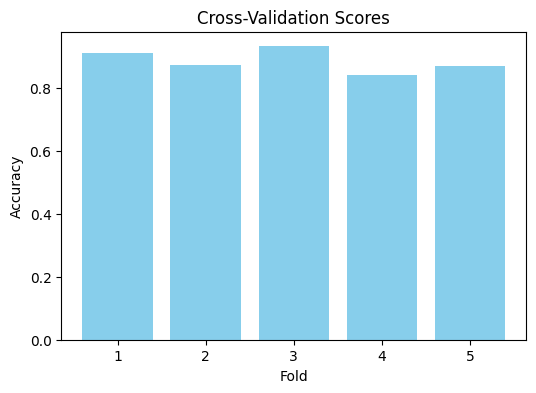

In [68]:
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), cv_acc, color="skyblue")
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

In [69]:
joblib.dump(best_rf, 'HeartDisease_rf.pkl')

['HeartDisease_rf.pkl']